#### First some imports

In [1]:
# for algebra 
import numpy as np
# for data processing
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#### Let's load the data and see what we are working with

In [2]:
data = pd.read_csv('beds.csv')
data.head()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care
0,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Medical/Surgical Acute (includes GYN/DOU),30660.0,2835.0,11297.0,0
1,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Pediatric Acute,0.0,0.0,0.0,0
2,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326
3,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Coronary Care,2920.0,0.0,0.0,0
4,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Acute Respiratory Care,0.0,0.0,0.0,0


In [3]:
data.shape

(77085, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77085 entries, 0 to 77084
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        77084 non-null  float64
 1   COUNTY                                      77084 non-null  object 
 2   OSHPD_ID                                    77084 non-null  float64
 3   Facility Name                               77084 non-null  object 
 4   Licensed Bed Classification                 77084 non-null  object 
 5   License Bed Designation                     49554 non-null  object 
 6   Licensed Bed Day                            77084 non-null  float64
 7   Discharges                                  77084 non-null  float64
 8   Census Day                                  77084 non-null  float64
 9   Intra Hospital Transfer from Critical Care  77085 non-null  int64  
dtypes: float64

****
We can see that we have some null values mixed in with the data, and we can confirm which ones they are by:

In [5]:
data.isnull().sum()

Year                                              1
COUNTY                                            1
OSHPD_ID                                          1
Facility Name                                     1
Licensed Bed Classification                       1
License Bed Designation                       27531
Licensed Bed Day                                  1
Discharges                                        1
Census Day                                        1
Intra Hospital Transfer from Critical Care        0
dtype: int64

****
So we have a lot of null values in one category and one null value in the other ones. Let's get rid of these 

In [6]:
data = data.dropna()

Let's check one last time

In [7]:
data.isnull().sum()

Year                                          0
COUNTY                                        0
OSHPD_ID                                      0
Facility Name                                 0
Licensed Bed Classification                   0
License Bed Designation                       0
Licensed Bed Day                              0
Discharges                                    0
Census Day                                    0
Intra Hospital Transfer from Critical Care    0
dtype: int64

****
And we are good,

we can also delete the duplicate values as that will:
* make data heavier that it needs to be
* lower the model efficiency and speed 

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.head()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care
0,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Medical/Surgical Acute (includes GYN/DOU),30660.0,2835.0,11297.0,0
1,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Pediatric Acute,0.0,0.0,0.0,0
2,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326
3,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Coronary Care,2920.0,0.0,0.0,0
4,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Acute Respiratory Care,0.0,0.0,0.0,0


****
Now, we can also clearly see that some of the values are just 0 across the board, so let's check them

In [10]:
data.shape

(49554, 10)

In [11]:
data[data['Licensed Bed Day']==0].head()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care
1,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Pediatric Acute,0.0,0.0,0.0,0
4,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Acute Respiratory Care,0.0,0.0,0.0,0
5,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Burn Center,0.0,0.0,0.0,0
6,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care Newborn Nursery,0.0,0.0,0.0,0
7,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Rehabilitation Center,0.0,0.0,0.0,0


In [12]:
len(data[data['Licensed Bed Day']==0])

32162

****
For these rows, everything is zero, that is not really helping the model to predict anything, so let's just get rid of these

In [13]:
data = data[data['Licensed Bed Day']!=0]

In [14]:
data.drop(0, inplace = True)

****
For the problem we are doing, we only need ICU cases, so the others can be removed.

In [15]:
data= data[data["License Bed Designation"]=="Intensive Care"]

In [16]:
data.shape

(3867, 10)

Now we have only 3867 rows of data but it is what we need instead of useless data.


In [17]:
something = data
something.to_csv("Original Data(cleaned).csv", index=False)

### Some columns are confusing, so we can change them to be more friendly:


1. License Bed Day : number of total licensed total beds --> licensed total beds
2. Census Day : daily census of total patients --> beds occupied


In [18]:
data.rename(columns={'Licensed Bed Day':'Licensed Total Beds',
                          'Census Day':'Beds Occupied'}, 
                 inplace=True)

In [19]:
data.head()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Total Beds,Discharges,Beds Occupied,Intra Hospital Transfer from Critical Care
2,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326
16,2005.0,Alameda,106010739.0,ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS,General Acute Care,Intensive Care,5840.0,486.0,6923.0,1394
30,2005.0,Alameda,106010776.0,CHILDRENS HOSPITAL AND RESEARCH CTR AT OAKLAND,General Acute Care,Intensive Care,8395.0,731.0,6372.0,1583
58,2005.0,Alameda,106010805.0,EDEN MEDICAL CENTER,General Acute Care,Intensive Care,5119.0,372.0,3775.0,637
100,2005.0,Alameda,106010846.0,ALAMEDA CO MED CTR - HIGHLAND CAMPUS,General Acute Care,Intensive Care,7300.0,257.0,5218.0,1150


### Target Variable

So, we now need a **target variable** that is the **number of beds available**:

This can be easily calcualted using simple arithmetic calculations:
* **Total Beds - (total patients in ICU - (total patients coming out of ICU))**

In [20]:
# we just calculate all the values of available beds from all the rows
list_available_beds = data["Licensed Total Beds"]-(data['Beds Occupied']-(data['Discharges']+data['Intra Hospital Transfer from Critical Care']))

# and make it a new column in the datafrane
data["Available Beds"] = list_available_beds

In [21]:
data.head()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Total Beds,Discharges,Beds Occupied,Intra Hospital Transfer from Critical Care,Available Beds
2,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326,2047.0
16,2005.0,Alameda,106010739.0,ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS,General Acute Care,Intensive Care,5840.0,486.0,6923.0,1394,797.0
30,2005.0,Alameda,106010776.0,CHILDRENS HOSPITAL AND RESEARCH CTR AT OAKLAND,General Acute Care,Intensive Care,8395.0,731.0,6372.0,1583,4337.0
58,2005.0,Alameda,106010805.0,EDEN MEDICAL CENTER,General Acute Care,Intensive Care,5119.0,372.0,3775.0,637,2353.0
100,2005.0,Alameda,106010846.0,ALAMEDA CO MED CTR - HIGHLAND CAMPUS,General Acute Care,Intensive Care,7300.0,257.0,5218.0,1150,3489.0


****

### Visualization

Now that we have all the data we need, let's see the visual representation of some of them to understand them better

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


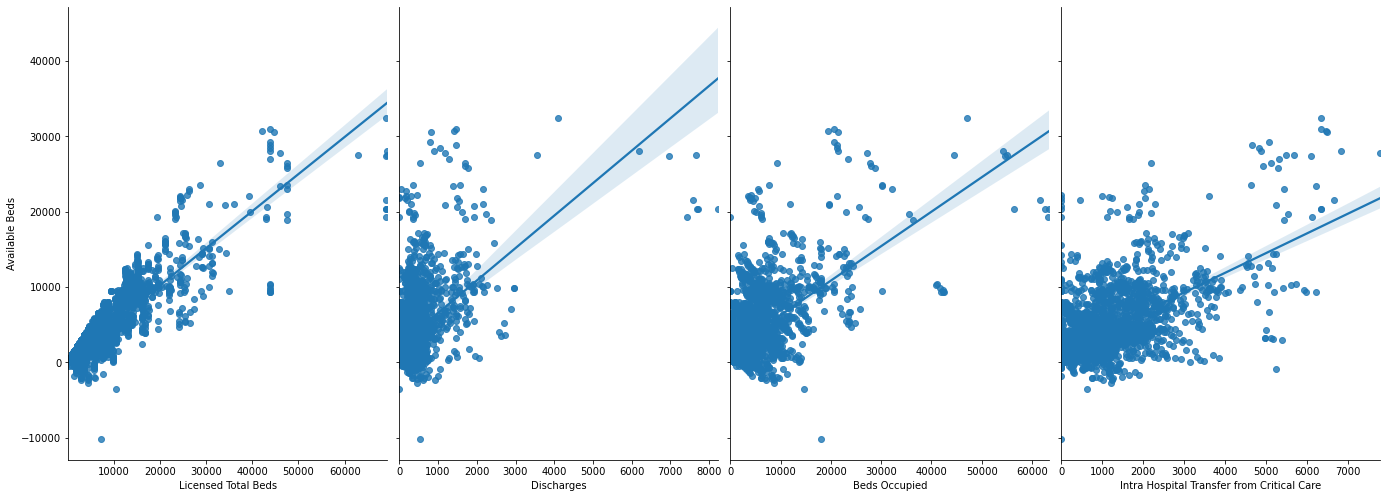

In [22]:
# for the realtionship between the important variables
sns.pairplot(data, x_vars=['Licensed Total Beds','Discharges','Beds Occupied', 'Intra Hospital Transfer from Critical Care'], y_vars='Available Beds', size=7, aspect=0.7, kind='reg')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


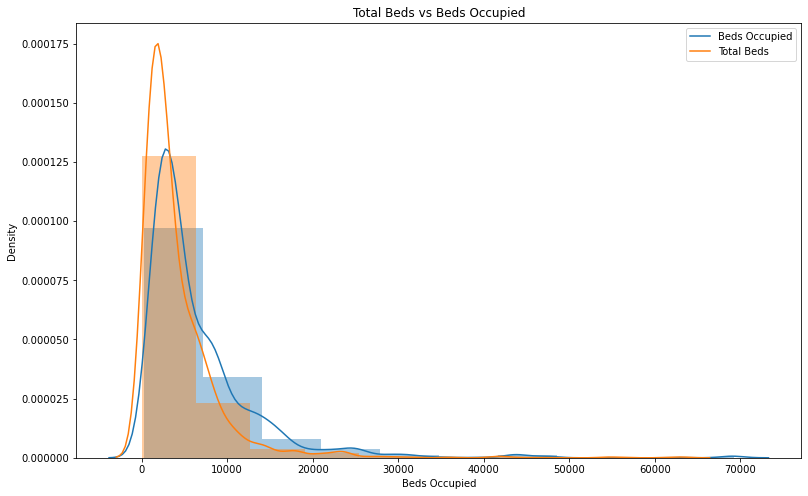

In [23]:
# plot distplot
fig, ax = plt.subplots(figsize = (13,8))
# the values
sns.distplot(data['Licensed Total Beds'], bins = 10, ax = ax)
sns.distplot(data['Beds Occupied'], bins = 10, ax = ax)
# add some legend to better identify everything
plt.legend(labels=["Beds Occupied", "Total Beds"])
# add title to the plot
ax.set_title( "Total Beds vs Beds Occupied")  

plt.show()

***
From this plot, we can infer:

* In most of the cases, the blue line is **below** the orange line, i.e. **we have free beds we can allot**

* In some cases, the blue line is **above** the orange line, i.e. **we have a shortage of beds** 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


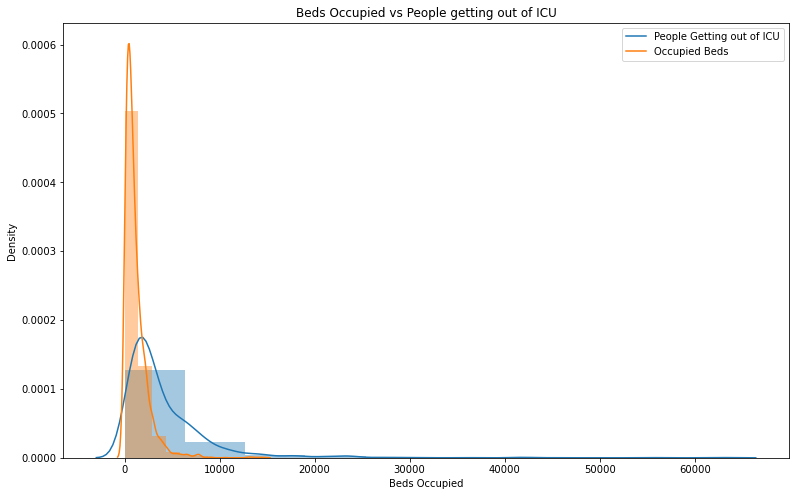

In [24]:
# plot distplot
fig, ax = plt.subplots(figsize = (13,8))
# the values
sns.distplot(data['Beds Occupied'], bins = 10, ax = ax)
sns.distplot(data['Discharges']+data['Intra Hospital Transfer from Critical Care'], bins = 10, ax = ax)
# add some legend to better identify everything
plt.legend(labels=["People Getting out of ICU", "Occupied Beds"])
# add title to the plot
ax.set_title( "Beds Occupied vs People getting out of ICU")  

plt.show()

***
From this plot, we can infer:

* In most of the cases, **the people getting out of ICU are very small compared to all the occupied beds, which is why there is shortage of beds**

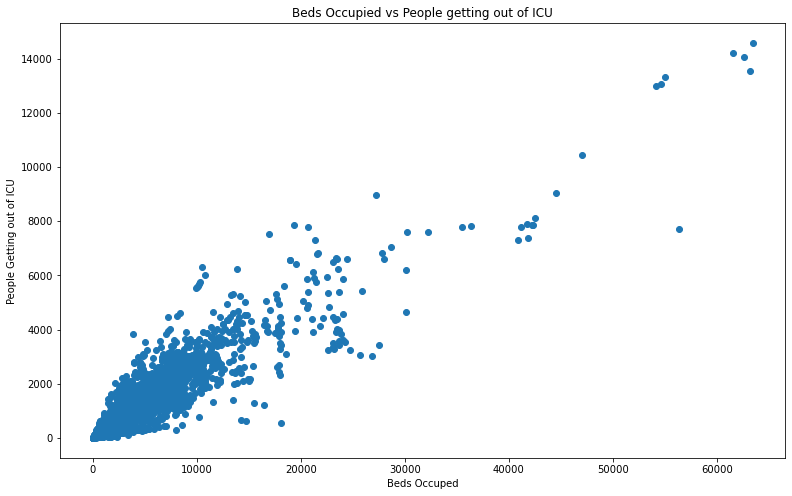

In [25]:
# relationship between beds occupied and people leaving 
fig, ax = plt.subplots(figsize = (13,8))
# the values
ax.scatter(x = data['Beds Occupied'], y = (data['Discharges']+data['Intra Hospital Transfer from Critical Care']))
# add some legend to better identify everything
plt.xlabel("Beds Occuped")
plt.ylabel("People Getting out of ICU")
# add title to the plot
ax.set_title( "Beds Occupied vs People getting out of ICU")  

plt.show()
# sns.jointplot(x = data['Beds Occupied'], y = (data['Discharges']+data['Intra Hospital Transfer from Critical Care']))


***
From this plot, we can infer:

* There is a somewhat linear relationship between the total beds occupied in the Icu and people getting out of ICU

****

### Now that we have an idea of the trends that the data follows, let's get it ready for training. We need to:


* **Step-1**: Get the object columns encoded so we can find out the correlation between them.
    
    * Correlation is only calculated between continous variables and not object type.



* **Step-2**: Get rid of excess/useless columns that do not help, and pick the best to start training
    
    * For this we can use correlation of these columns with the target variable to fish out the good attributes




### Step-1: Encoding


In [26]:
print(data.columns)

print("\nUnique values in Licensed Bed Classification:", data['Licensed Bed Classification'].unique())
print("\nUnique values in License Bed Designation:", data['License Bed Designation'].unique())

Index(['Year', 'COUNTY', 'OSHPD_ID', 'Facility Name',
       'Licensed Bed Classification', 'License Bed Designation',
       'Licensed Total Beds', 'Discharges', 'Beds Occupied',
       'Intra Hospital Transfer from Critical Care', 'Available Beds'],
      dtype='object')

Unique values in Licensed Bed Classification: ['General Acute Care']

Unique values in License Bed Designation: ['Intensive Care']


#### Columns:

1. Year: to be removed as it is not useful.

2. County: needs encoding.

3. OSHPD_ID: to be removed as it is not useful.

4. Facility Name: needs encoding.

5. Licensed Bed Classification: only has one value, serves no purpose.

6. License Bed Designation : only has one value, serves no purpose.

In [27]:
# create an instance
le = LabelEncoder()

data.COUNTY = le.fit_transform(data.COUNTY)
data['Facility Name'] = le.fit_transform(data['Facility Name'])

data.head()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Total Beds,Discharges,Beds Occupied,Intra Hospital Transfer from Critical Care,Available Beds
2,2005.0,50,106010735.0,4,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326,2047.0
16,2005.0,50,106010739.0,7,General Acute Care,Intensive Care,5840.0,486.0,6923.0,1394,797.0
30,2005.0,50,106010776.0,49,General Acute Care,Intensive Care,8395.0,731.0,6372.0,1583,4337.0
58,2005.0,50,106010805.0,105,General Acute Care,Intensive Care,5119.0,372.0,3775.0,637,2353.0
100,2005.0,50,106010846.0,2,General Acute Care,Intensive Care,7300.0,257.0,5218.0,1150,3489.0


### Step-2: Correlation


In [28]:
correlation = data.corr()
print(correlation["Available Beds"].sort_values(ascending = False))

Available Beds                                1.000000
Licensed Total Beds                           0.880827
Intra Hospital Transfer from Critical Care    0.619776
Beds Occupied                                 0.597511
Discharges                                    0.508840
Year                                          0.112516
COUNTY                                        0.046273
OSHPD_ID                                     -0.005859
Facility Name                                -0.024325
Name: Available Beds, dtype: float64


Text(0, 0.5, 'Features')

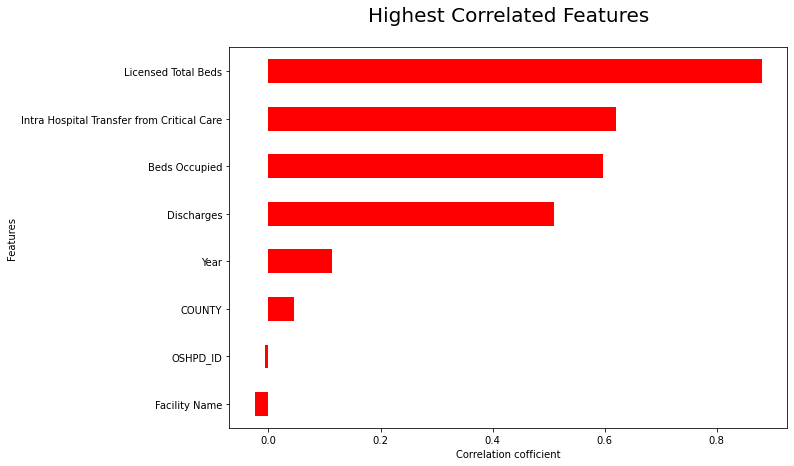

In [29]:
plt.figure(figsize=(10,7))
correlation["Available Beds"].apply(lambda x: (x)).sort_values(ascending=False).iloc[1:9][::-1].plot(kind='barh',color='red')
plt.title('Highest Correlated Features', size=20,pad=26)
plt.xlabel('Correlation cofficient')
plt.ylabel('Features')

### Now that we have our features, we can select them, and get rid of the bad ones

In [30]:
data2 = data.drop(['OSHPD_ID','Licensed Bed Classification','License Bed Designation','Year'],axis=1)
data2.head()

,COUNTY,Facility Name,Licensed Total Beds,Discharges,Beds Occupied,Intra Hospital Transfer from Critical Care,Available Beds
2,50,4,2920.0,170.0,1369.0,326,2047.0
16,50,7,5840.0,486.0,6923.0,1394,797.0
30,50,49,8395.0,731.0,6372.0,1583,4337.0
58,50,105,5119.0,372.0,3775.0,637,2353.0
100,50,2,7300.0,257.0,5218.0,1150,3489.0


### Done.

### Now we can move on to the training part.

In [31]:
# split the independent and dependent variables

# independent variables
X = data2.iloc[:, :-1]
# target variable
y = data2.iloc[:,-1]


In [32]:
X.head()

,COUNTY,Facility Name,Licensed Total Beds,Discharges,Beds Occupied,Intra Hospital Transfer from Critical Care
2,50,4,2920.0,170.0,1369.0,326
16,50,7,5840.0,486.0,6923.0,1394
30,50,49,8395.0,731.0,6372.0,1583
58,50,105,5119.0,372.0,3775.0,637
100,50,2,7300.0,257.0,5218.0,1150


In [33]:
y.head()

2      2047.0
16      797.0
30     4337.0
58     2353.0
100    3489.0
Name: Available Beds, dtype: float64

****
#### Let's split them into test and train sets

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Size of x_train:", x_train.shape)
print("\nSize of x_test:", x_test.shape)
print("\nSize of y_train:", y_train.shape)
print("\nSize of y_test:", y_test.shape)

Size of x_train: (2706, 6)

Size of x_test: (1161, 6)

Size of y_train: (2706,)

Size of y_test: (1161,)


****
### Linear Regression

In [35]:
# import
from sklearn.linear_model import LinearRegression

In [36]:
# load the model with normalization
model =  LinearRegression(normalize=True)
# fit the training data
model.fit(x_train,y_train) 

LinearRegression(normalize=True)

In [37]:
y_pred_test = model.predict(x_test)
y_pred_test

array([ 425., 3349., 2095., ..., 2614., 1464., 6682.])

****
The performance of the model

In [38]:
model.intercept_

-1.3642420526593924e-12

In [39]:
model.coef_

array([-1.06797017e-14,  1.88337330e-15,  1.00000000e+00,  1.00000000e+00,
       -1.00000000e+00,  1.00000000e+00])

In [40]:
# predict the main values of the data
y_pred = model.predict(X)
y_pred

array([2047.,  797., 4337., ..., 1979., 1578., 5036.])

In [41]:
y_pred.shape

(3867,)

In [42]:
# we don't want the float values which the model will predict and only need the integer values of how many beds are 
#available
for i in range(len(y_pred)):
    y_pred[i] = int(y_pred[i])

****
Let's get the data we previously cleaned and saved to add this new predicted values to make it easier to read

In [43]:
original_data = pd.read_csv('Original Data(cleaned).csv')

In [44]:
original_data["Beds Available"] = y_pred

In [45]:
original_data.head()

,Year,COUNTY,OSHPD_ID,Facility Name,Licensed Bed Classification,License Bed Designation,Licensed Bed Day,Discharges,Census Day,Intra Hospital Transfer from Critical Care,Beds Available
0,2005.0,Alameda,106010735.0,ALAMEDA HOSPITAL,General Acute Care,Intensive Care,2920.0,170.0,1369.0,326,2046.0
1,2005.0,Alameda,106010739.0,ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS,General Acute Care,Intensive Care,5840.0,486.0,6923.0,1394,796.0
2,2005.0,Alameda,106010776.0,CHILDRENS HOSPITAL AND RESEARCH CTR AT OAKLAND,General Acute Care,Intensive Care,8395.0,731.0,6372.0,1583,4337.0
3,2005.0,Alameda,106010805.0,EDEN MEDICAL CENTER,General Acute Care,Intensive Care,5119.0,372.0,3775.0,637,2352.0
4,2005.0,Alameda,106010846.0,ALAMEDA CO MED CTR - HIGHLAND CAMPUS,General Acute Care,Intensive Care,7300.0,257.0,5218.0,1150,3488.0


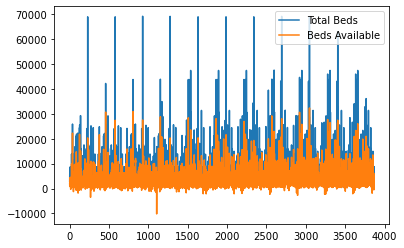

In [46]:
plt.plot(original_data[["Licensed Bed Day",'Beds Available']])
plt.legend(["Total Beds","Beds Available"])

In [47]:
original_data.to_csv("predicted.csv", index=False)